# Saltelli's example (1.3)

In [6]:
from matplotlib import pyplot
import pandas
from scipy import stats

import sensitivity_analysis


def model_full(Z_0, Z_1, Z_2, Z_3, Ω_0, Ω_1, Ω_2, Ω_3):
    y = (Ω_0 * Z_0 + Ω_1 * Z_1 + Ω_2 * Z_2 + Ω_3 * Z_3)
    try:
        return y.rename('y')
    except AttributeError:
        return y


def model_simple(Z_0, Z_1, Z_2, Z_3, Ω=2):
    return model_full(Z_0, Z_1, Z_2, Z_3, Ω, Ω, Ω, Ω)


Z = {f'Z_{i}': stats.norm(0, i + 1)
     for i in range(4)}
Ω = {f'Ω_{i}': stats.norm((i + 1) * 0.5, i + 1) 
     for i in range(4)}
parameters_simple = Z
parameters_full = dict(**Z, **Ω)

## Figure 1.6

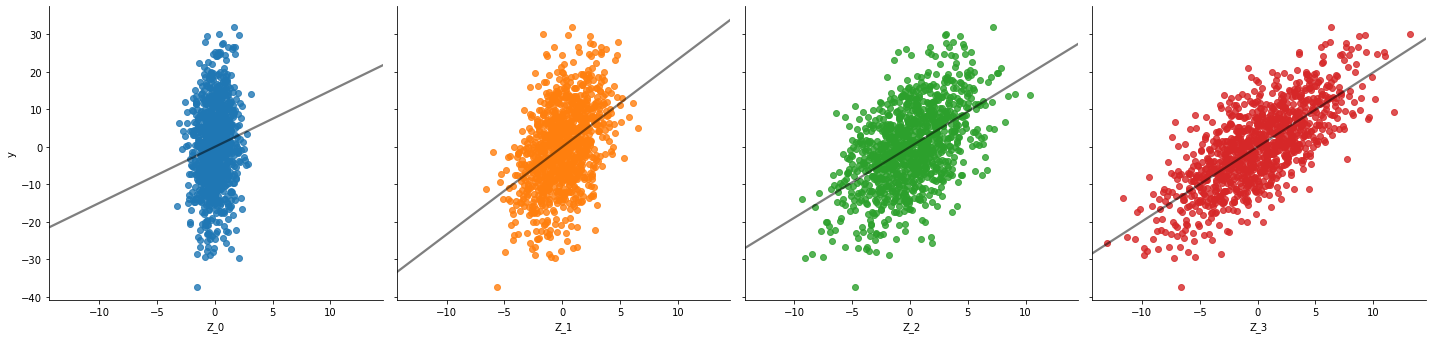

In [8]:
n_samples = 1000
fg = sensitivity_analysis.scatterplots(
    model_simple, parameters_simple, n_samples, sharex=True)

## Tables 1.1 & 1.2

In [3]:
def bold_sum(s):
    '''Made the 'Sum' row bold.'''
    is_sum = (s.index == 'Sum')
    return ['font-weight: bold' if v else '' for v in is_sum]


def display_with_sums(table):
    '''Add column sums and display.'''
    table = table.copy()
    table.loc['Sum'] = table.sum()
    return table.style.apply(bold_sum)
    

def get_all_sensitivities(model, parameters, n_samples):
    '''Run all of the sensitivity methods.'''
    table = {}
    sensitivity = sensitivity_analysis.sensitivity(
        model, parameters, n_samples)
    table[r'$S^2$'] = sensitivity ** 2
    beta = sensitivity_analysis.linreg_coefficients(
        model, parameters, n_samples)
    table[r'$\beta^2$'] = beta ** 2
    table[r'$\nu$'] = sensitivity_analysis.DGSM(
        model, parameters, n_samples)
    sensitivity_sigma = sensitivity_analysis.sensitivity(
        model, parameters, n_samples, normalized=True)
    table[r'$S_{\sigma}^2$'] = sensitivity_sigma ** 2
    beta_sigma = sensitivity_analysis.linreg_coefficients(
        model, parameters, n_samples, normalized=True)
    table[r'$\beta_{\sigma}^2$'] = beta_sigma ** 2
    (S, _, S_T, _) = sensitivity_analysis.Sobol_indexes(
        model, parameters, n_samples)
    table[r'$S$'] = S
    table[r'$S_T$'] = S_T
    table[r'$\nu_{\sigma}$'] = sensitivity_analysis.DGSM(
        model, parameters, n_samples, normalized=True)
    rho_PR = sensitivity_analysis.PRCC(
        model, parameters, n_samples)
    table[r'$\rho_{\text{rank, partial}}^2$'] = rho_PR ** 2
    return pandas.DataFrame(table)


n_samples = 1000
table = get_all_sensitivities(model_simple, parameters_simple, n_samples)
display_with_sums(table)

,$S^2$,$\beta^2$,$\nu$,$S_{\sigma}^2$,$\beta_{\sigma}^2$,$S$,$S_T$,$\nu_{\sigma}$,"$\rho_{\text{rank, partial}}^2$"
Z_0,4,4,4,0.0356395,0.0326021,0.0012138,0.0681638,0.0326643,0.349248
Z_1,4,4,4,0.143176,0.129963,0.104006,0.176199,0.130108,0.675344
Z_2,4,4,4,0.320917,0.29217,0.284386,0.314917,0.293583,0.841386
Z_3,4,4,4,0.570658,0.518884,0.539574,0.573351,0.521138,0.899729
Sum,16,16,16,1.07039,0.973619,0.92918,1.13263,0.977492,2.76571


In [4]:
(model, parameters) = (model_simple, parameters_simple)
# (model, parameters) = (model_full, parameters_full)
n_samples = 1000
X = sensitivity_analysis.samples_Latin_hypercube(
    parameters, n_samples)
y = model(**X)

table = pandas.DataFrame({
    r'$\rho^2$': sensitivity_analysis.stats.CC(X, y) ** 2,
    r'$\rho_{\text{partial}}^2$': sensitivity_analysis.stats.PCC(X, y) ** 2,
    r'$\rho_{\text{rank}}^2$': sensitivity_analysis.stats.RCC(X, y) ** 2,
    r'$\rho_{\text{rank, partial}}^2$': sensitivity_analysis.stats.PRCC(X, y) ** 2,
})
display_with_sums(table)

,$\rho^2$,$\rho_{\text{partial}}^2$,$\rho_{\text{rank}}^2$,"$\rho_{\text{rank, partial}}^2$"
Z_0,0.0149727,1,0.0122636,0.313001
Z_1,0.09975,1,0.0851439,0.664322
Z_2,0.298189,1,0.271362,0.824139
Z_3,0.539087,1,0.510588,0.895326
Sum,0.951999,4,0.879357,2.69679


# Saltelli's example (1.3) & (1.27)

## Tables 1.3 & 1.5

In [5]:
# n_samples = 40000
n_samples = 1000

table = get_all_sensitivities(model_full, parameters_full, n_samples)
display_with_sums(table)

,$S^2$,$\beta^2$,$\nu$,$S_{\sigma}^2$,$\beta_{\sigma}^2$,$S$,$S_T$,$\nu_{\sigma}$,"$\rho_{\text{rank, partial}}^2$"
Z_0,0.24925,0.240355,1.24886,0.000603034,7.19882e-05,0.0960126,-0.0185568,0.00285636,0.00446496
Z_1,1.00005,0.609572,5.00493,0.00961135,0.00580246,0.103473,0.0352835,0.0460605,0.0105238
Z_2,2.25175,2.19988,11.2811,0.0486821,0.0323683,0.0969718,0.223658,0.232783,0.0516636
Z_3,3.98671,5.74417,19.9952,0.153473,0.184239,0.159965,0.74221,0.731118,0.125587
Ω_0,2.16657e-10,0.0179575,1.00735,6.67746e-11,5.62204e-10,0.0976597,-0.0166239,0.00228297,0.000139047
Ω_1,7.93006e-09,0.0103575,3.99297,4.28898e-10,0.0011629,0.0865111,0.0248316,0.0368618,0.000193025
Ω_2,3.56527e-06,0.00590937,9.04255,3.17947e-08,0.00186902,0.0566008,0.166444,0.186301,3.22032e-05
Ω_3,9.67348e-08,0.0442298,15.9654,1.11864e-07,0.000719046,-0.0206642,0.534664,0.584809,0.000347854
Sum,7.48776,8.87244,67.5385,0.21237,0.226232,0.676529,1.69191,1.82307,0.192951
